# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project we try to scrap Ethereum Historical Data from Coingecko website. CoinGecko provides a fundamental analysis of the crypto market. In addition to tracking price, volume and market capitalisation, CoinGecko tracks community growth, open-source code development, major events and on-chain metrics. We will try to scrap this sites for educational purpose and capstone project for Algoritma Data Science Course only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Indonesia's inflation rate. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 2 points from this sites. One is inflation Date and Volume is measures month over month change in the price of goods and services. measures year over year (last 12 montha) change in the price of goods. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. menggunakan `soup.find` dan mengambil class 'tbody' untuk mengambil data yang ada di dalaman tabel 

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


Finding row length.

In [5]:
row = table.findAll('tr')
row_length = len(row)
row_length

60

untuk mengambil `date` pada tabel menggunakan `table.find_all('th')` dan untuk mengambil data volume menggunakan `table.find_all('td', attrs={'class':'text-center'})` dan menggunakan index subsetting `[4*i+1]` untuk mengambil kolom volume yang berada di kolom index `1` dan mengambil series yang index nya selalu looping di posisi ke `4`

In [6]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    
    #get date 
    period = table.find_all('th')[i].text
         
    #get volume
    volume = table.find_all('td', attrs={'class':'text-center'})[4*i+1].text.replace('$','').replace(',','')#replace $ sign and ,
    volume = volume.strip() #to remove excess white space
    
    temp.append((period,volume)) 
    
temp

[('2021-06-30', '27149143847'),
 ('2021-06-29', '30629329806'),
 ('2021-06-28', '24316408028'),
 ('2021-06-27', '24249510321'),
 ('2021-06-26', '25981381067'),
 ('2021-06-25', '22447489242'),
 ('2021-06-24', '28098744045'),
 ('2021-06-23', '38755019937'),
 ('2021-06-22', '39499960408'),
 ('2021-06-21', '26235850447'),
 ('2021-06-20', '20456963375'),
 ('2021-06-19', '26204484921'),
 ('2021-06-18', '25708624827'),
 ('2021-06-17', '26150320395'),
 ('2021-06-16', '26803957680'),
 ('2021-06-15', '28128172338'),
 ('2021-06-14', '29382118964'),
 ('2021-06-13', '28235882062'),
 ('2021-06-12', '26751786966'),
 ('2021-06-11', '33075957437'),
 ('2021-06-10', '43973432438'),
 ('2021-06-09', '48344195674'),
 ('2021-06-08', '37385872210'),
 ('2021-06-07', '29050162249'),
 ('2021-06-06', '34731979705'),
 ('2021-06-05', '39996583175'),
 ('2021-06-04', '38104663185'),
 ('2021-06-03', '39148856525'),
 ('2021-06-02', '39898648753'),
 ('2021-06-01', '44445830388'),
 ('2021-05-31', '37392021394'),
 ('2021-

In [7]:
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','volume'))
df.head()

,period,volume
0,2021-05-02,36721647718
1,2021-05-03,35727432416
2,2021-05-04,64192650586
3,2021-05-05,78437235046
4,2021-05-06,63552342594


In [9]:
df.dtypes

period    object
volume    object
dtype: object

Memeriksa type data dan mengubah type data sesuai dengan kebutuhan proses, menggunakan `astype`,   mengubah data type `object` pada data frame `df`, `volume` menjadi `float64` dan `period` menjadi `datetime64`

In [10]:
df['volume'] = df['volume'].astype('float64')
df['period'] = df['period'].astype('datetime64')
df.dtypes


period    datetime64[ns]
volume           float64
dtype: object

In [11]:
df = df.set_index('period')

menjadikan `period` sebagai index untuk memudahkan pembacaan saat di visualisasikan ke sebuat graph

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='period'>

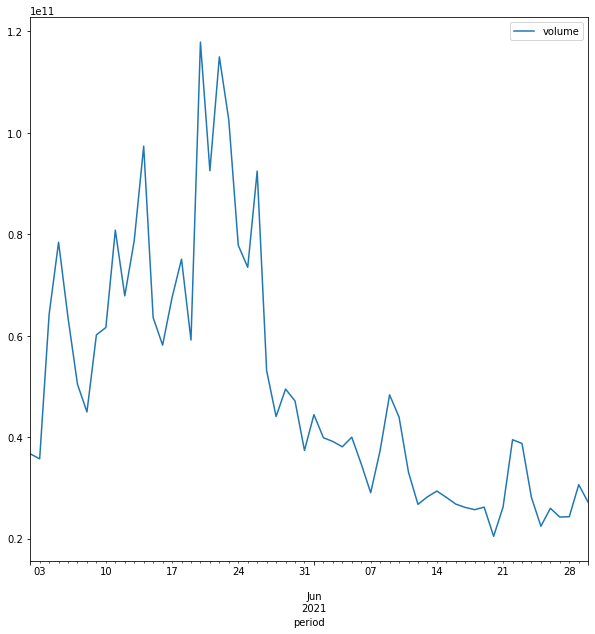

In [12]:
df.plot(figsize = (10,10))

# Analysis
from data we scrapping from CoinGecko.com, we find there are many changes from 2020-2021 in volume ETH (Ethereum) Transaction. The most volume transaction ETH happened in january 2021, but we see on graph volume decreased after that and back bounce back on may and june. so we had conclusion the most volume on January 2021 although there is a decrease but it rises again in May and June, and from that on 2021 volume transaction ETH is on the rise in the market.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.